## 20daysofcode Challenge
**ML | Day 4: EXPLORING THE BREAST CANCER DATASET**
- Load the breast cancer data from sklearn into a pandas DataFrame of features and target with their appropriate headers.
- Extract the top 10 correlated features alongside the target into a new dataframe.
- Make a pairplot of the top 5 correlated features. Make a copy of this version of the dataframe and for each feature replace all values less than their respective mean with NaN.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Get Dataset

In [2]:
from sklearn.datasets import load_breast_cancer

### Load Dataset

In [3]:
cancer_data = load_breast_cancer()

### Convert dataset to pandas Dataframe

In [4]:
#load dataser feature variables into dataframe
breast_cancer = pd.DataFrame(data=cancer_data['data'], columns=cancer_data['feature_names'])
#display first few rows
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#add breast_cancer dataset target column to dataframe above, naming it 'class'
breast_cancer['diagnosis']=cancer_data.target
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

We have 569 samples, 31 feature variables (that's a couple!), 1 target variable. Also, there are no missing values in our dataset.

### Relationship between features 

In [7]:
corr_data  = breast_cancer.corr()
corr_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560


In [8]:
#check features that correlate most with target variable
corr = breast_cancer.corr()
corr_target = corr['diagnosis']

#load top 10 features that correlate with diagnosis column..
corr_features = corr_target.sort_values(ascending=False)
corr_features

diagnosis                  1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

#### Extract top 10 features that correlates with target variable into a dataframe

In [9]:
#get top correlated features
top_10_features = corr_features.head(11)
top_10_features

diagnosis                  1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
Name: diagnosis, dtype: float64

In [10]:
#get feature names, so we can use them as column names in our dataframe
top_10_features_col = top_10_features.index
top_10_features_col

Index(['diagnosis', 'smoothness error', 'mean fractal dimension',
       'texture error', 'symmetry error', 'fractal dimension error',
       'concavity error', 'compactness error', 'worst fractal dimension',
       'mean symmetry', 'mean smoothness'],
      dtype='object')

In [11]:
#load top 10 correlated features into a dataframe
breast_cancer_corr = breast_cancer[top_10_features_col]
breast_cancer_corr

,diagnosis,smoothness error,mean fractal dimension,texture error,symmetry error,fractal dimension error,concavity error,compactness error,worst fractal dimension,mean symmetry,mean smoothness
0,0,0.006399,0.07871,0.9053,0.03003,0.006193,0.05373,0.04904,0.11890,0.2419,0.11840
1,0,0.005225,0.05667,0.7339,0.01389,0.003532,0.01860,0.01308,0.08902,0.1812,0.08474
2,0,0.006150,0.05999,0.7869,0.02250,0.004571,0.03832,0.04006,0.08758,0.2069,0.10960
3,0,0.009110,0.09744,1.1560,0.05963,0.009208,0.05661,0.07458,0.17300,0.2597,0.14250
4,0,0.011490,0.05883,0.7813,0.01756,0.005115,0.05688,0.02461,0.07678,0.1809,0.10030
...,...,...,...,...,...,...,...,...,...,...,...
564,0,0.010300,0.05623,1.2560,0.01114,0.004239,0.05198,0.02891,0.07115,0.1726,0.11100
565,0,0.005769,0.05533,2.4630,0.01898,0.002498,0.03950,0.02423,0.06637,0.1752,0.09780
566,0,0.005903,0.05648,1.0750,0.01318,0.003892,0.04730,0.03731,0.07820,0.1590,0.08455
567,0,0.006522,0.07016,1.5950,0.02324,0.006185,0.07117,0.06158,0.12400,0.2397,0.11780


#### Pairplot of Top 5 correlated features

In [12]:
#get top 5 correlated features
top_5_features = corr_features.head(6)
top_5_features

diagnosis                  1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
Name: diagnosis, dtype: float64

In [13]:
#load top 5 correlated features into a dataframe
top_5_features_df = breast_cancer_corr[top_5_features.index]
top_5_features_df.sample(3)

,diagnosis,smoothness error,mean fractal dimension,texture error,symmetry error,fractal dimension error
388,1,0.010380,0.07252,1.0670,0.01219,0.012330
61,1,0.011930,0.06757,2.0670,0.03357,0.003048
309,1,0.004148,0.05518,0.8285,0.01422,0.002273


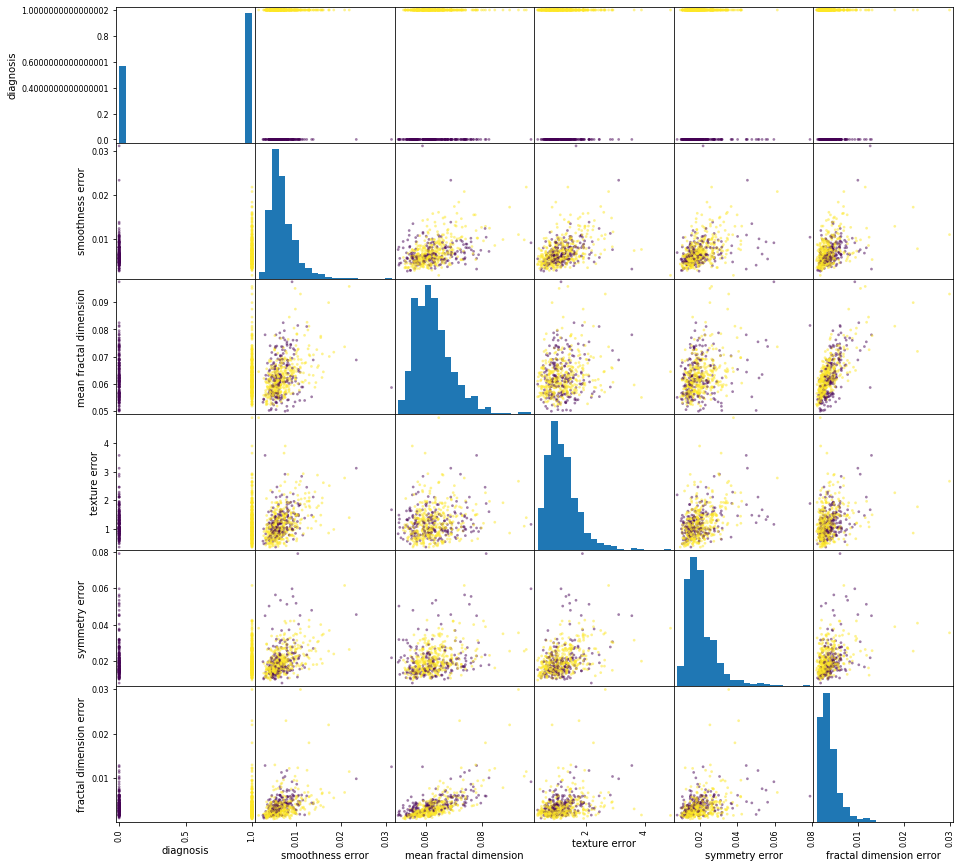

In [14]:
#pairplot top 5 correlated features and target variable
top_5_corr_plot = pd.plotting.scatter_matrix(top_5_features_df, c = top_5_features_df['diagnosis'], 
                                 figsize = (15,15), s=30, cmap = 'viridis', hist_kwds={'bins':20})
plt.show()

#### Replace all features values less than their respective mean with NaN.

In [15]:
# make a copy of top 5 correlated features dataframe
top_5_features_df_copy = top_5_features_df.copy()
top_5_features_df_copy.head(3)

,diagnosis,smoothness error,mean fractal dimension,texture error,symmetry error,fractal dimension error
0,0,0.006399,0.07871,0.9053,0.03003,0.006193
1,0,0.005225,0.05667,0.7339,0.01389,0.003532
2,0,0.006150,0.05999,0.7869,0.02250,0.004571


In [16]:
top_5_features_df_copy.mean()

diagnosis                  0.627417
smoothness error           0.007041
mean fractal dimension     0.062798
texture error              1.216853
symmetry error             0.020542
fractal dimension error    0.003795
dtype: float64

In [17]:
#check column data for values less than column mean
is_below_mean = top_5_features_df_copy < top_5_features_df_copy.mean()
is_below_mean.head(6)

,diagnosis,smoothness error,mean fractal dimension,texture error,symmetry error,fractal dimension error
0,True,True,False,True,False,False
1,True,True,True,True,True,True
2,True,True,True,True,False,False
3,True,False,False,True,False,False
4,True,False,True,True,True,False
5,True,False,False,True,False,False


In [18]:
#set values below mean to null
top_5_features_df_copy[(top_5_features_df_copy < top_5_features_df_copy.mean())] = np.nan

In [19]:
top_5_features_df_copy

,diagnosis,smoothness error,mean fractal dimension,texture error,symmetry error,fractal dimension error
0,NaN,NaN,0.07871,NaN,0.03003,0.006193
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.02250,0.004571
3,NaN,0.009110,0.09744,NaN,0.05963,0.009208
4,NaN,0.011490,NaN,NaN,NaN,0.005115
...,...,...,...,...,...,...
564,NaN,0.010300,NaN,1.256,NaN,0.004239
565,NaN,NaN,NaN,2.463,NaN,NaN
566,NaN,NaN,NaN,NaN,NaN,0.003892
567,NaN,NaN,0.07016,1.595,0.02324,0.006185
